# Data Understanding

### Student Data

In [1]:
import pandas as pd

#student = pd.read_sas(
#    "../../databases/2022/STU_QQQ_SAS/CY08MSP_STU_QQQ.SAS7BDAT", format="sas7bdat"
#)

student = pd.read_csv('../../databases/2022/STU_QQQ_SAS/student2022.csv')

In [2]:
def filter_by_grade(dataframe, grade):
    return dataframe[dataframe["ST001D01T"] == grade]

Podemos observar que existem muitos alunos de 15 anos no 11º e 12º anos

In [3]:
non_repeating_students = student[student["REPEAT"] == 0]
print(f"Número de alunos total: {len(student)}")
student_grades = student["ST001D01T"].value_counts().reset_index()
student_grades.columns = ["Ano", "Contagem"]
print(student_grades)

repeating_students = student[student["REPEAT"] == 1]
print(f"Número de alunos repetentes: {len(repeating_students)}")
repeating_students_grades = repeating_students["ST001D01T"].value_counts().reset_index()
repeating_students_grades.columns = ["Ano", "Repetentes"]
print(repeating_students_grades)

Número de alunos total: 613744
    Ano  Contagem
0  10.0    356822
1   9.0    169907
2  11.0     42529
3   8.0     19679
4  98.0     16043
5   7.0      4251
6  12.0      2254
7  96.0      2250
8  13.0         5
9  99.0         4
Número de alunos repetentes: 60004
    Ano  Repetentes
0   9.0       31402
1  10.0       13111
2   8.0       10751
3   7.0        3004
4  11.0        1164
5  98.0         283
6  96.0         227
7  12.0          59
8  99.0           3


A maioria dos alunos no 11º e 12º anos está a estudar em Inglaterra

In [4]:
grade_11 = filter_by_grade(student, 11)
print(f"Países dos alunos de 11º ano:")
print(grade_11[["CNT"]].value_counts().head(5))
grade_12 = filter_by_grade(student, 12)
print(f"Países dos alunos de 12º ano:")
print(grade_12[["CNT"]].value_counts().head(5))

Países dos alunos de 11º ano:
CNT   
b'GBR'    11131
b'ARE'     5912
b'NZL'     4240
b'BRA'     3071
b'MLT'     3004
Name: count, dtype: int64
Países dos alunos de 12º ano:
CNT   
b'GBR'    1507
b'ARE'     247
b'CHE'     167
b'NZL'     125
b'KHM'      34
Name: count, dtype: int64


Decidimos tratar os alunos ingleses como uma exceção e fazer um estudo sem estes alunos, uma vez que o ensino inglês funciona de forma diferente dos restantes países. Ver: https://b28mathstutor.co.uk/how-the-english-school-system-works/#:~:text=Unlike%20in%20some%20countries%2C%20students,1%2C%20also%20known%20as%20Infants

In [5]:
filtered_students = student[(student["CNT"] != "b'GBR'")]
filtered_students

print(f"Países dos alunos de 12º ano:")
grade_12 = filter_by_grade(filtered_students, 12)
print(grade_12[["CNT"]].value_counts().head(10))

Países dos alunos de 12º ano:
CNT   
b'ARE'    247
b'CHE'    167
b'NZL'    125
b'KHM'     34
b'IRL'     25
b'BRA'     20
b'BRN'     20
b'IDN'     19
b'DOM'     18
b'SAU'     12
Name: count, dtype: int64


Todos os alunos de 15 anos no 11º, 12º e 13º vão também ser condiderados exceções. Uma vez que são casos raros, que são justificados por serem alunos sobredotados (e terem passado um ou mais anos à frente), o número de dados não é suficiente para fazer uma análise satisfatória.

In [6]:
grade_11 = filter_by_grade(filtered_students, 11)
print(
    f"Número de alunos no 11º ano: {len(grade_11) / len(filtered_students) * 100:.2f}%"
)

grade_12 = filter_by_grade(filtered_students, 12)
print(
    f"Número de alunos no 12º ano: {len(grade_12) / len(filtered_students) * 100:.2f}%"
)

grade_13 = filter_by_grade(filtered_students, 13)
print(
    f"Número de alunos no 13º ano: {len(grade_13) / len(filtered_students) * 100:.4f}%"
)

filtered_students = filtered_students[(~filtered_students["ST001D01T"].isin([11, 12, 13]))]

Número de alunos no 11º ano: 5.23%
Número de alunos no 12º ano: 0.12%
Número de alunos no 13º ano: 0.0002%


In [7]:
from columns_list import (
    math_subscales,
    math_columns,
    science_columns,
    reading_columns,
    get_math_results,
    get_science_results,
    get_reading_results,
)


def remove_columns(dataframe, column_list):
    new_df = dataframe.copy()
    new_df = new_df.drop(columns=column_list)

    return new_df


def get_student_results(dataframe, math_columns, science_columns, reading_columns):
    new_df = dataframe.copy()
    new_df = get_math_results(new_df, math_columns)
    new_df = get_science_results(new_df, science_columns)
    new_df = get_reading_results(new_df, reading_columns)

    return new_df

In [8]:
filtered_students = get_student_results(
    filtered_students, math_columns, science_columns, reading_columns
)
filtered_students = remove_columns(filtered_students, math_subscales)

non_repeating_students_filtered = filtered_students[filtered_students["REPEAT"] == 0]
repeating_students_filtered = filtered_students[filtered_students["REPEAT"] == 1]

non_repeating_students_filtered

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,W_FSTURWT78,W_FSTURWT79,W_FSTURWT80,UNIT,WVARSTRR,SENWT,VER_DAT,Avg Math Result,Avg Science Result,Avg Reading Result
0,b'ALB',8.0,800282.0,800001.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,1.59631,1.58021,4.70887,1.0,50.0,0.55561,b'03MAY23:10:11:25',223.0351,301.2603,249.8026
1,b'ALB',8.0,800115.0,800002.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,2.12833,2.16631,6.40402,1.0,41.0,0.76431,b'03MAY23:10:11:25',308.4938,303.5314,288.8999
2,b'ALB',8.0,800242.0,800003.0,b'08MS',b'000800',b'ALB01',b'0080000',800.0,0.0,...,11.86015,11.79079,3.96558,1.0,19.0,1.37877,b'03MAY23:10:11:25',313.7353,323.6492,311.7785
4,b'ALB',8.0,800285.0,800006.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,5.55627,5.78305,5.80990,1.0,56.0,0.65249,b'03MAY23:10:11:26',475.7512,466.7572,486.6689
5,b'ALB',8.0,800172.0,800007.0,b'08MS',b'000800',b'ALB04',b'0080000',800.0,0.0,...,2.13936,2.13936,6.59165,2.0,7.0,0.74922,b'03MAY23:10:11:25',521.2832,501.5938,430.5666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613739,b'UZB',860.0,86000120.0,86007488.0,b'08MS',b'086000',b'UZB26',b'8600000',86000.0,0.0,...,93.94156,93.94156,44.86576,2.0,52.0,0.71987,b'02MAY23:13:18:15',327.0151,288.5284,312.5706
613740,b'UZB',860.0,86000140.0,86007489.0,b'08MS',b'086000',b'UZB04',b'8600000',86000.0,0.0,...,85.52983,85.52983,40.84838,2.0,19.0,0.65541,b'02MAY23:13:18:13',286.4383,282.6895,271.9545
613741,b'UZB',860.0,86000024.0,86007490.0,b'08MS',b'086000',b'UZB10',b'8600000',86000.0,0.0,...,98.21009,98.21009,32.73670,1.0,44.0,0.67910,b'02MAY23:13:18:13',411.8666,380.6084,330.4373
613742,b'UZB',860.0,86000174.0,86007491.0,b'08MS',b'086000',b'UZB16',b'8600000',86000.0,0.0,...,33.07798,99.23393,99.23393,1.0,53.0,0.68618,b'02MAY23:13:18:14',338.1192,372.8060,353.0499


Vamos mostrar a correlação entre as variáveis numéricas e os resultados de matemática obtidos entre os alunos. Os gráficos demonstrados irão ser utilizados para realizar uma comparação entre os alunos repetentes e não repetentes.

In [9]:
repeating_correlations = repeating_students_filtered.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)

repeating_correlations = repeating_correlations.drop("Avg Math Result")

non_repeating_correlations = non_repeating_students_filtered.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)

non_repeating_correlations = non_repeating_correlations.drop("Avg Math Result")

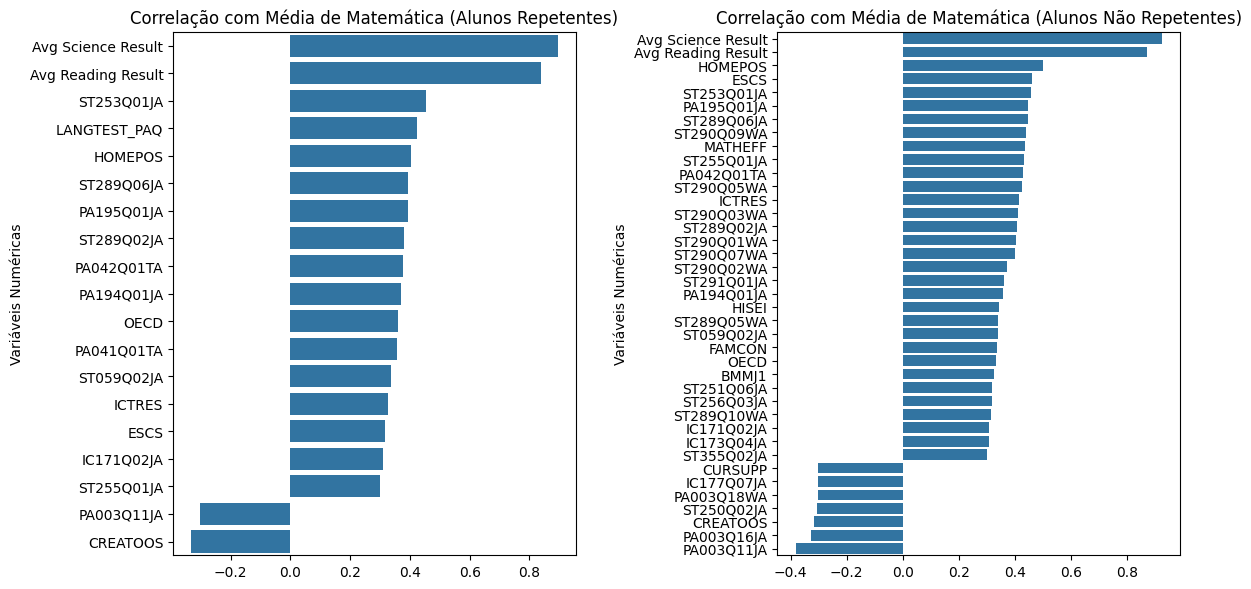

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

repeating_correlations = repeating_correlations[repeating_correlations.abs() > 0.3]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.barplot(x=repeating_correlations.values, y=repeating_correlations.index)
plt.title("Correlação com Média de Matemática (Alunos Repetentes)")
plt.ylabel("Variáveis Numéricas")

plt.subplot(1, 2, 2)

non_repeating_correlations = non_repeating_correlations[
    non_repeating_correlations.abs() > 0.3
]
sns.barplot(x=non_repeating_correlations.values, y=non_repeating_correlations.index)
plt.title("Correlação com Média de Matemática (Alunos Não Repetentes)")
plt.ylabel("Variáveis Numéricas")

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [20]:
grade_7_repeating = filter_by_grade(repeating_students_filtered, 7)
grade_8_repeating = filter_by_grade(repeating_students_filtered, 8)
grade_9_repeating = filter_by_grade(repeating_students_filtered, 9)
grade_10_repeating = filter_by_grade(repeating_students_filtered, 10)
grade_7_not_repeating = filter_by_grade(non_repeating_students_filtered, 7)
grade_8_not_repeating = filter_by_grade(non_repeating_students_filtered, 8)
grade_9_not_repeating = filter_by_grade(non_repeating_students_filtered, 9)
grade_10_not_repeating = filter_by_grade(non_repeating_students_filtered, 10)

# Correlation for repeating students
repeating_correlations_grade_7 = grade_7_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)
repeating_correlations_grade_8 = grade_8_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)
repeating_correlations_grade_9 = grade_9_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)
repeating_correlations_grade_10 = grade_10_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)

# Correlation for non-repeating students
not_repeating_correlations_grade_7 = grade_7_not_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)
not_repeating_correlations_grade_8 = grade_8_not_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)
not_repeating_correlations_grade_9 = grade_9_not_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)
not_repeating_correlations_grade_10 = grade_10_not_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)

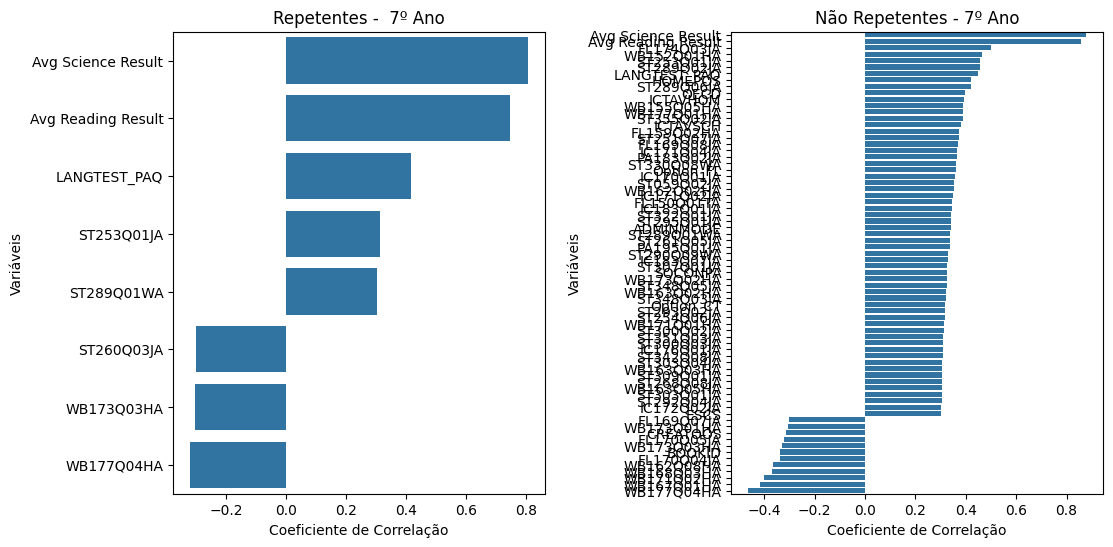

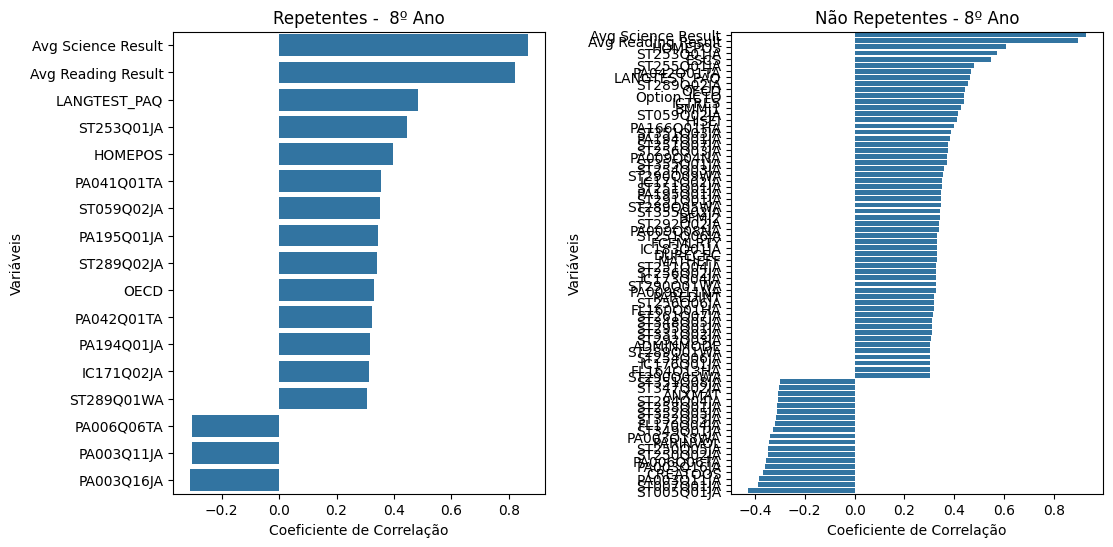

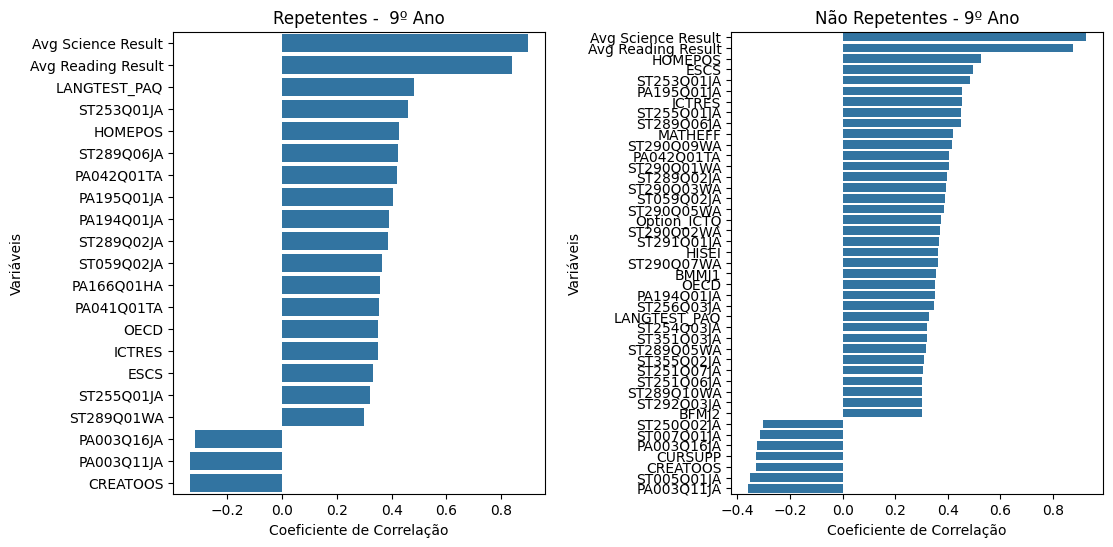

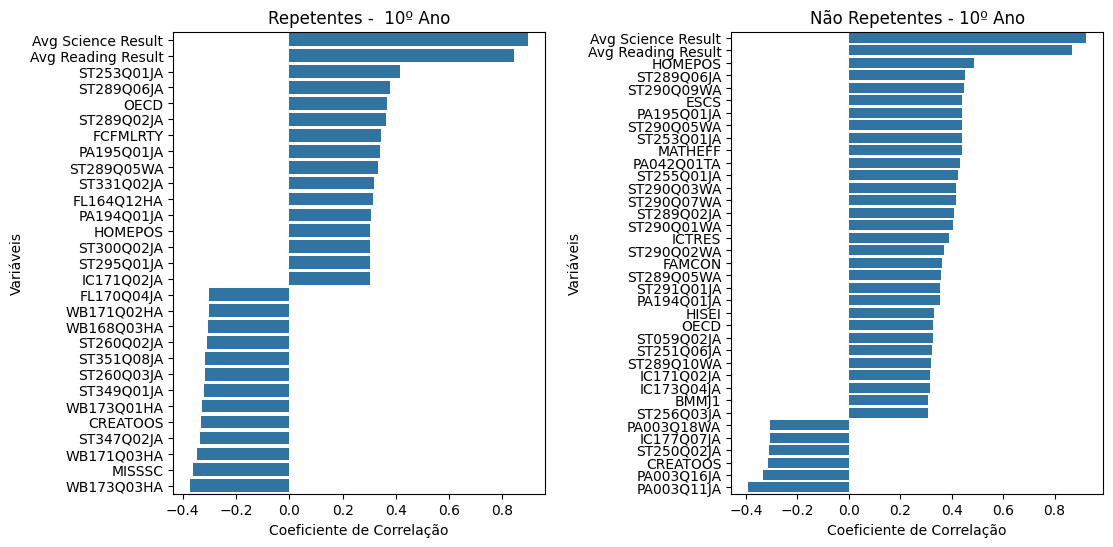

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

repeating_dict = {
    7: repeating_correlations_grade_7,
    8: repeating_correlations_grade_8,
    9: repeating_correlations_grade_9,
    10: repeating_correlations_grade_10,
}
not_repeating_dict = {
    7: not_repeating_correlations_grade_7,
    8: not_repeating_correlations_grade_8,
    9: not_repeating_correlations_grade_9,
    10: not_repeating_correlations_grade_10,
}

for grade, _ in repeating_dict.items():
    repeating_corr = repeating_dict[grade].drop("Avg Math Result")
    not_repeating_corr = not_repeating_dict[grade].drop("Avg Math Result")

    repeating_filtered = repeating_corr[repeating_corr.abs() > 0.3]
    not_repeating_filtered = not_repeating_corr[not_repeating_corr.abs() > 0.3]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(x=repeating_filtered.values, y=repeating_filtered.index)
    plt.title(f"Repetentes -  {grade}º Ano")
    plt.xlabel("Coeficiente de Correlação")
    plt.ylabel("Variáveis")

    plt.subplot(1, 2, 2)
    sns.barplot(x=not_repeating_filtered.values, y=not_repeating_filtered.index)
    plt.title(f"Não Repetentes - {grade}º Ano")
    plt.xlabel("Coeficiente de Correlação")
    plt.ylabel("Variáveis")

    plt.subplots_adjust(wspace=0.5)

    plt.show()

In [10]:
categorical_columns = repeating_students_filtered.select_dtypes(
    include=["object", "category"]
).columns

categorical_columns

Index(['CNT', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'ST250D06JA',
       'ST250D07JA', 'ST251D08JA', 'ST251D09JA', 'ST330D10WA', 'OCOD1',
       'OCOD2', 'OCOD3', 'PROGN', 'COBN_S', 'COBN_M', 'COBN_F', 'VER_DAT'],
      dtype='object')

CNT, NatCen, STRATUM, SUBNATION - Relacionados (País)

COBN_S, COBN_M, COBN_F - País de nascimento próprio, mãe e pai, respetivamente

OCOD1, OCOD2, OCOD3 - Ocupação mãe, pai e próprio, respetivamente

Country specific:

ST250D06JA, ST250D07JA

ST251D08JA, ST251D09JA

ST330D10WA 

PROGN

## Show relation of students by country that repeated

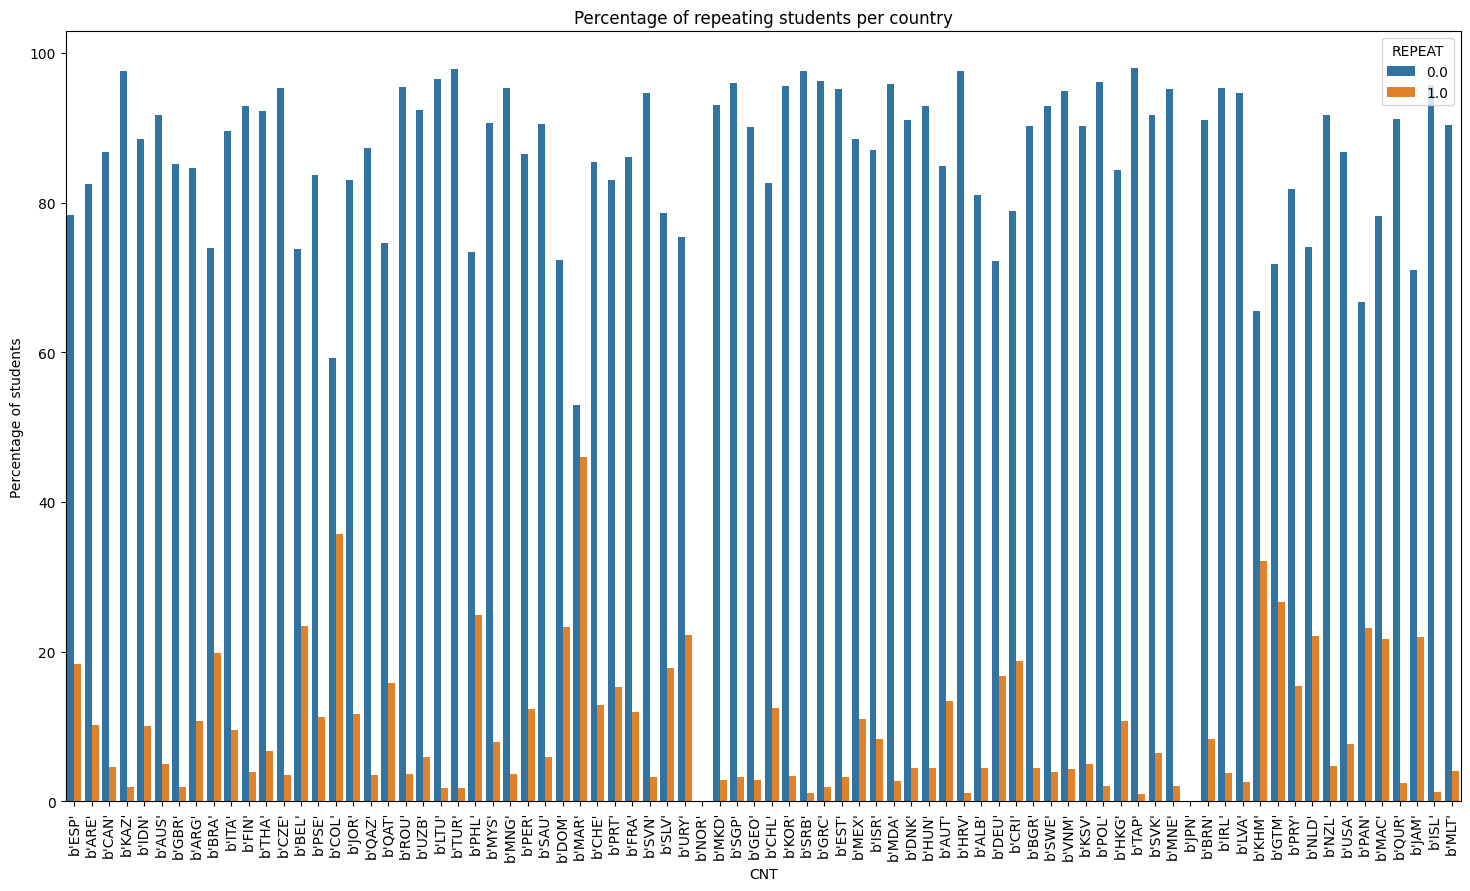

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

student_repeat = student.groupby(["CNT", "REPEAT"]).size().reset_index(name="count")
cnt_totals = student["CNT"].value_counts()

plt.figure(figsize=[18, 10])

sns.barplot(
    data=student_repeat,
    x="CNT",
    y=student_repeat.apply(
        lambda row: (row["count"] / cnt_totals[row["CNT"]]) * 100, axis=1
    ),
    hue="REPEAT",
    order=cnt_totals.index,
)

plt.title("Percentage of repeating students per country")
plt.xticks(rotation="vertical")
plt.ylabel("Percentage of students")

plt.show()